Algorithms are a set of finite rules which give a set of operation to solve a specific problem.

In [ ]:
import matplotlib.pyplot as plt

def ball_trajectory(x):
 location = 10*x - 5*(x**2)
 return(location)


X = [x/100 for x in list(range(201))]
ys = [ball_trajectory(x) for x in X]
plt.plot(xs,ys)
plt.title('The Trajectory of a Thrown Ball')
plt.xlabel('Horizontal Position of Ball')
plt.ylabel('Vertical Position of Ball')
plt.axhline(y = 0)
plt.show()


# MAXIMIZING AND MINIMIZING

Finding the maximum and minimum of function using calculus

In [ ]:
import math
def revenue(tax):
 return(100 * (math.log(tax+1) - (tax - 0.2)**2 + 0.04))


import matplotlib.pyplot as plt
xs = [x/1000 for x in range(1001)]
ys = [revenue(x) for x in xs]
plt.plot(xs,ys)
plt.title('Tax Rates and Revenue')
plt.xlabel('Tax Rate')
plt.ylabel('Revenue')
plt.show()


We used four rules of calculus to derive that function. First, we
used the rule that the derivative of log(x) is 1/x. That’s why the
derivative of log(tax + 1) is 1/(tax + 1). Another rule is that the
derivative of x is 2x. That’s why the derivative of (tax – 0.2) is
2(tax – 0.2). Two more rules are that the derivative of a
constant number is always 0, and the derivative of 100f(x) is
100 times the derivative of f(x). If you combine all these rules,
you’ll find that our tax-revenue function, 100(log(tax + 1) –
(tax – 0.2) + 0.04), has a derivative equal to the following, as
described in the Python function:

$$100((\frac{1}{tax+1})-2(tax-0.2))$$

First define what a step is, next we can take a step in the direction of the maximum by
finding a new rate that is proportional to one step size away
from our current rate, in the direction of the maximum:

In [ ]:
def revenue_derivative(tax):
 return(100 * (1/(tax + 1) - 2 * (tax - 0.2)))

step_size = 0.001
current_rate = 0.7
while abs(revenue_derivative(current_rate)) > 0.001:
    current_rate = current_rate + step_size * revenue_derivative(current_rate)
print(f"The best rate is: {current_rate}")


The algorithms of gradient accents: 

1. Start with a current_rate and a step_size.
2. Calculate the derivative of the function you are trying to
maximize at the current_rate.
3. Add step_size * revenue_derivative(current_rate) to
the current rate, to get a new current_rate.
4. Repeat steps 2 and 3 until you are so close to the
maximum that your current tax rate is changing less
than a very small threshold at each step, or until you
have reached a number of iterations that is sufficiently
high.


What we are instressted in are the global maximum and minimum, which can be difficult to find in very complex function as we fill often just take a small step to a higher place which will often lead to a local maximum and minimum can be a difficult to over come when using gradient ascent.

Below you will see a function with multiple local maximum: 

In [ ]:
import math
import matplotlib.pyplot as plt

def income(edu_yrs):
 return(math.sin((edu_yrs - 10.6) * (2 * math.pi/4)) + (edu_yrs -
11)/2)


xs = [11 + x/100 for x in list(range(901))]
ys = [income(x) for x in xs]
plt.plot(xs,ys)
current_edu = 12.5
plt.plot(current_edu,income(current_edu),'ro')
plt.title('Education and Income')
plt.xlabel('Years of Education')
plt.ylabel('Lifetime Income')
plt.show()

In [ ]:
import math

# The problem with this code is that it only able to find the local maximum 
def income_derivative(edu_yrs):
 return(math.cos((edu_yrs - 10.6) * (2 * math.pi/4)) + 1/2)

threshold = 0.0001
maximum_iterations = 100000
current_education = 12.5
step_size = 0.1
keep_going = True
iterations = 0

while(keep_going):
 
    education_change = step_size * income_derivative(current_education)
    current_education = current_education + education_change
    if(abs(education_change) < threshold):
        keep_going = False
    if(iterations >= maximum_iterations):
        keep_going=False
    iterations = iterations + 1
print(current_education)

In fact, moving from maximization to minimization is quite
simple. One way to do it is to “flip” our function or, more
precisely, to take its negative. Going back to our tax/revenue
curve example, it is as simple as defining a new flipped function
like so:


In [ ]:
import math
def revenue(tax):
 return(100 * (math.log(tax+1) - (tax - 0.2)**2 + 0.04))

def revenue_flipped(tax):
 return(0 - revenue(tax))

import matplotlib.pyplot as plt
xs = [x/1000 for x in range(1001)]
ys = [revenue_flipped(x) for x in xs]
plt.plot(xs,ys)
plt.title('The Tax/Revenue Curve - Flipped')
plt.xlabel('Current Tax Rate')
plt.ylabel('Revenue - Flipped')
plt.show()


In [ ]:
threshold = 0.0001
maximum_iterations = 10000

def revenue_derivative(tax):
 return(100 * (1/(tax + 1) - 2 * (tax - 0.2)))

def revenue_derivative_flipped(tax):
 return(0-revenue_derivative(tax))

current_rate = 0.7
keep_going = True
iterations = 0

while(keep_going):
 rate_change = step_size * revenue_derivative_flipped(current_rate)
 current_rate = current_rate - rate_change
 if(abs(rate_change) < threshold):
    keep_going = False
 if(iterations >= maximum_iterations):
     keep_going = False
 iterations = iterations + 1

print(current_rate)

Gradient ascent works well if we start with the right ingredients:
* A mathematical function to maximize
* Knowledge of where we currently are
* An unequivocal goal to maximize the function
* Ability to alter where we are

# SORTING AND SEARCHING

In [ ]:
#Insert entry into a sorted list

def insert_cabinet(cabinet,to_insert):
    check_location = len(cabinet) - 1
    insert_location = 0
    while(check_location >= 0):
        
        if to_insert > cabinet[check_location]:
            insert_location = check_location + 1
            check_location = - 1


        check_location = check_location - 1

    cabinet.insert(insert_location,to_insert)
    
    return(cabinet)
 
cabinet = [1,2,3,3,4,6,8,12]
newcabinet = insert_cabinet(cabinet,5)
print(newcabinet)



In [ ]:
# Sorting via insertion
cabinet = [8,4,6,1,2,5,3,7]
def insertion_sort(cabinet):
 newcabinet = []
 while len(cabinet) > 0:
    newcabinet = insert_cabinet(newcabinet, cabinet.pop(0))
 return(newcabinet)
sortedcabinet = insertion_sort(cabinet)
print(sortedcabinet)


In [ ]:
# Measuring algorithm's time with timeit to understand the efficiency in seconds

from timeit import default_timer as timer
start = timer()
cabinet = [8,4,6,1,2,5,3,7]
sortedcabinet = insertion_sort(cabinet)
end = timer()
print(end - start)


The problem with this method of evaluating the efficiency of the code is that the precise amount of seconds need comes done to hardware utility and not the algorithms performance.

Instead of using time to understand the algorithm it better to use **step(s)** to analysis the performance as it is independent of what hardware the code is running on.


In [ ]:
def insert_cabinet(cabinet,to_insert):
    check_location = len(cabinet) - 1
    insert_location = 0
    global stepcounter
    while(check_location >= 0):
        stepcounter += 1
        if to_insert > cabinet[check_location]:
            insert_location = check_location + 1
            check_location = - 1
        check_location = check_location - 1

    stepcounter += 1
    cabinet.insert(insert_location,to_insert)
    return(cabinet)

def insertion_sort(cabinet):
    newcabinet = []
    global stepcounter
    while len(cabinet) > 0:
        stepcounter += 1
        to_insert = cabinet.pop(0)
        newcabinet = insert_cabinet(newcabinet,to_insert)
    return(newcabinet)

cabinet = [8,4,6,1,2,5,3,7]
stepcounter = 0
sortedcabinet = insertion_sort(cabinet)
print(stepcounter)

In [ ]:
import random

def check_steps(size_of_cabinet):
    cabinet = [int(1000 * random.random()) for i in range(size_of_cabinet)]
    global stepcounter
    stepcounter = 0
    sortedcabinet = insertion_sort(cabinet)
    return(stepcounter)

random.seed(5040) #To ensure we get the same result every time making it easier to compare
xs = list(range(1,100))
ys = [check_steps(x) for x in xs]
print(ys)


import matplotlib.pyplot as plt
plt.plot(xs,ys)
plt.title('Steps Required for Insertion Sort for Random Cabinets')
plt.xlabel('Number of Files in Random Cabinet')
plt.ylabel('Steps Required to Sort Cabinet by Insertion Sort')
plt.show()

# COMPARING TO WELL-KNOWN FUNCTIONS

When we want to compare function like the insert-sort function we defined earlier to do so with something called Big O, where O stand for order I like to think about it a operation. 

We see this to talk about the amount of operation need give a list with n elements. 
The most optimal function when working with a list is *Big O of n* also written as O(n). 

Lets do back to the insert-sort algorithm it was three operations
- Read from the list = n
- Compare to the other in the list = n-1
- Insert into a new list = n

Taking all three together we get $n^2+n-1$ because of the magnitude of $n^2$ compared to n-1 when working we large number we do not really mention it
giving us the final formula of $O(n^2)$

Lets look at merge-sort with has a Big O of $$O(n \times log_2(n))$$

It works by splitting up the list into smaller and smaller parts through recursion and starting to sort these small list first and unravel itself to have a sorted the full list. 

In [13]:
steps = 0

def merging(left,right):
    newcabinet = []
    print(f"left: {left}, right: {right}")
    while(min(len(left),len(right)) > 0):
        if left[0] > right[0]:
            to_insert = right.pop(0)
            newcabinet.append(to_insert)
        elif left[0] <= right[0]:
            to_insert = left.pop(0)
            newcabinet.append(to_insert)
    if(len(left) > 0):
        for i in left:
            newcabinet.append(i)
    if(len(right) > 0):
        for i in right:
            newcabinet.append(i)
    return(newcabinet)

import math
def mergesort(cabinet):
    print(cabinet)
    newcabinet = []
    global steps
    if(len(cabinet) == 1):
        newcabinet=cabinet
    else:
        left = mergesort(cabinet[:math.floor(len(cabinet)/2)])
        right = mergesort(cabinet[math.floor(len(cabinet)/2):])
        newcabinet = merging(left,right)
    steps += 1
    
    return(newcabinet)

cabinet = [4,1,3,2,6,3,18,2,9,7,3,1,2.5,-9]
newcabinet=mergesort(cabinet)

print(f"The amount of steps need to sort the list: {steps}")
print(sorted(cabinet))

[4, 1, 3, 2, 6, 3, 18, 2, 9, 7, 3, 1, 2.5, -9]
[4, 1, 3, 2, 6, 3, 18]
[4, 1, 3]
[4]
[1, 3]
[1]
[3]
left: [1], right: [3]
left: [4], right: [1, 3]
[2, 6, 3, 18]
[2, 6]
[2]
[6]
left: [2], right: [6]
[3, 18]
[3]
[18]
left: [3], right: [18]
left: [2, 6], right: [3, 18]
left: [1, 3, 4], right: [2, 3, 6, 18]
[2, 9, 7, 3, 1, 2.5, -9]
[2, 9, 7]
[2]
[9, 7]
[9]
[7]
left: [9], right: [7]
left: [2], right: [7, 9]
[3, 1, 2.5, -9]
[3, 1]
[3]
[1]
left: [3], right: [1]
[2.5, -9]
[2.5]
[-9]
left: [2.5], right: [-9]
left: [1, 3], right: [-9, 2.5]
left: [2, 7, 9], right: [-9, 1, 2.5, 3]
left: [1, 2, 3, 3, 4, 6, 18], right: [-9, 1, 2, 2.5, 3, 7, 9]
The amount of steps need to sort the list: 27
[-9, 1, 1, 2, 2, 2.5, 3, 3, 3, 4, 6, 7, 9, 18]


# From Sorting to Searching

## binary search 

Is done my guessing the halfway point of a list, it the result is above or below you split the list again at half and guess using the halfway value.

In [32]:
# binary search 
import math
def binarysearch(list,taget):
    low = 0
    high = math.floor(len(list))
    mid = (low + high) // 2
    steps = 0
    while(abs(list[mid]-taget) > 0.0001):
        steps += 1
        mid = (low + high) // 2
        if(list[mid] > taget):
            high = mid 
        elif(list[mid] < taget):
            low = mid
            
    return(f"the number is at index: {mid} and it took {steps} steps to find")

list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print(binarysearch(list,8))

the number is at index: 7 and it took 3 steps to find


## Random number generator 

How do we create random numbers using computer which are not random

They way we test if a random number generator is any good 
- Long series before repeat of pattern
- uniform distribution of numbers
- Overlapping sum, this take list of generated numbers and take the sum of a sections of consecutive numbers when plotting these sum on a graph should represent a normal distribution


*LINEAR CONGRUENTIAL GENERATORS (LCG)*

Requires three variable and a the previous generated number, the start number of frequently *1*. 

$$next_number(prev_number \times n1 + n2) % n3$$


*LFSR* 

Based on left shift bit  
1. Discard the right most bit
2. Calculate the xor of the remanding bits
3. Insert the xor result to the left of the list.




In [3]:
# implement LINEAR CONGRUENTIAL GENERATORS

import random
def linear_congruential_generator(a,c,m,seed):
    random.seed(seed)
    return(a * (seed + c) % m)

for i in range(10):
 print(
 linear_congruential_generator(1,2,3,i)
 )


2
0
1
2
0
1
2
0
1
2


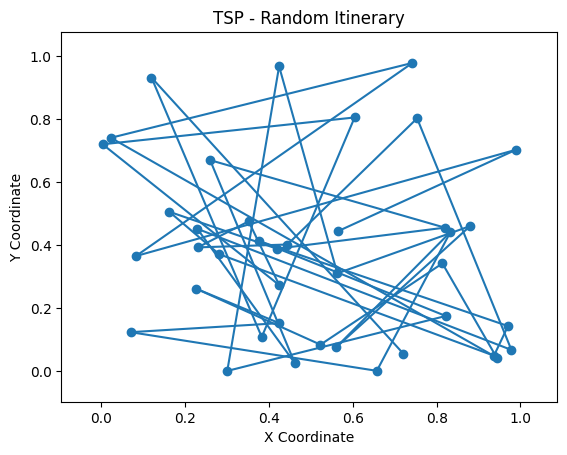

21.6923798895935

In [37]:
# Traveling sales man 

import numpy as np
import math
import matplotlib.collections as mc
import matplotlib.pylab as pl


np.random.seed(1028)

n = 40

x = np.random.rand(n)
y = np.random.rand(n)

points = zip(x,y)
cities = list(points)
itinerary = list(range(0,n))


def Cal_distance(lines):
    distance = 0

    for j in range(0,len(lines)):
        distance += math.sqrt((lines[j][1][0] - lines[j][0][0])**2 + (lines[j][1][1] - lines[j][0][1])**2)
    return(distance)

def genlines(cities,itinerary):
    lines = []
    for j in range(0,len(itinerary)-1):
        lines.append([cities[itinerary[j]],cities[itinerary[j + 1]]])
    return(lines)



def plotitinerary(points,itin,plottitle,):
    lc = mc.LineCollection(genlines(points,itin))
    fig, ax = pl.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    pl.scatter(x, y)
    pl.title(plottitle)
    pl.xlabel('X Coordinate')
    pl.ylabel('Y Coordinate')
    pl.show()
    pl.close()


plotitinerary(cities,itinerary,'TSP - Random Itinerary')
Cal_distance(genlines(cities,itinerary))

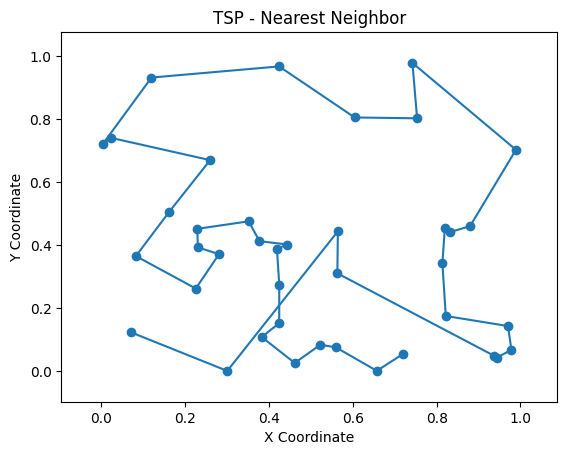

5.81899695124328

In [36]:
def findnearest(cities,idx,nnitierary):
    point = cities[idx]
    mindist = float('inf')
    minidx = -1

    for j in range(0,len(cities)):
        dist = math.sqrt((point[0] - cities[j][0])**2 + (point[1] - cities[j][1])**2)

        if dist < mindist and dist > 0 and j not in nnitierary:
            mindist = dist
            minidx = j

    return(minidx)



def donn(cities,n):
    itinerary = [0]

    for j in range(0,n-1):
        idx = findnearest(cities,itinerary[len(itinerary)-1],itinerary)
        itinerary.append(idx)
    return(itinerary)


plotitinerary(cities,donn(cities,n),'TSP - Nearest Neighbor')

Cal_distance(genlines(cities,donn(cities,n)))

# GEOMETRY